Carlos Andrade - Turma 857

# Projeto de Estatística II


## Parte I - Regressão Linear

-------------------------------

**Instruções:**

- A primeira parte do projeto engloba a avliação dos tópicos de regressão linear.
- Ela deve ser entregue até o dia 26/04/2022.
- Para a entrega, salve seu notebook na pasta Projetos do nosso drive com o nome do notebook com o seguinte padrão: [primeiro nome]_[sobrenome]_projeto_estatistica_II_parteI.ipynb
- A avaliação será registrada nos notebooks em formato de comentários.
-------------------------------

O dataset 'cancer_EUA.csv' relaciona a taxa de mortalidade por câncer em alguns condados dos EUA e outras features destes condados.

Dicionário dos dados:

* TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities

* avgAnnCount: Mean number of reported cases of cancer diagnosed annually

* avgDeathsPerYear: Mean number of reported mortalities due to cancer

* incidenceRate: Mean per capita (100,000) cancer diagoses

* medianIncome: Median income per county

* popEst2015: Population of county

* povertyPercent: Percent of populace in poverty

* studyPerCap: Per capita number of cancer-related clinical trials per county

* binnedInc: Median income per capita binned by decile

* MedianAge: Median age of county residents

* MedianAgeMale: Median age of male county residents

* MedianAgeFemale: Median age of female county residents

* Geography: County name

* AvgHouseholdSize: Mean household size of county

* PercentMarried: Percent of county residents who are married

* PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

* PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

* PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

* PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

* PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

* PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

* PctEmployed16_Over: Percent of county residents ages 16 and over employed

* PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

* PctPrivateCoverage: Percent of county residents with private health coverage

* PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

* PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

* PctPublicCoverage: Percent of county residents with government-provided health coverage

* PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

* PctWhite: Percent of county residents who identify as White

* PctBlack: Percent of county residents who identify as Black

* PctAsian: Percent of county residents who identify as Asian

* PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

* PctMarriedHouseholds: Percent of married households

* BirthRate: Number of live births relative to number of women in county

O objetivo da primeira parte do projeto é criar um modelo linear para prever o target (TARGET_deathRate). Para isso, siga o passo a passo abaixo e apresente seus raciocínios e resultados. 

1. Antes de qualquer exploração dos dados, leia o dicionário dos dados e reflita sobre a feature que você acredita ser mais correlacionada com o target. (Sem medo de errar. Não existe certo ou errado nesta questão.) 

Baseado apenas na leitura do dicionário, sem a exploração dos dados, creio que a quantidade de casos reportados esta mais diretamente ligado ao target (avgAnnCount: Mean number of reported cases of cancer diagnosed annually)

2. Agora, realize um EDA na base de dados para entender mais sobre as features. Quais são suas conclusões?

In [131]:
import numpy as np
import pandas as pd

df = pd.read_csv('./datasets/cancer_EUA.csv', sep=';')
df.head(3)

avgAnnCount   avgDeathsPerYear TARGET_deathRate incidenceRate medIncome  \
0      1397,0  890,7705285028013            164,9         489,8   61898,0   
1       173,0  669,0883630446194            161,3         411,6   48127,0   
2       102,0  744,0834616315638            174,7         349,7   49348,0   

  popEst2015 povertyPercent  studyPerCap           binnedInc MedianAge  ...  \
0   260131,0           11,2  499,7482038   (61494.5, 125635]      39,3  ...   
1    43269,0           18,6  23,11123437  (48021.6, 51046.4]      33,0  ...   
2    21026,0           14,6  47,56016361  (48021.6, 51046.4]      45,0  ...   

  PctPrivateCoverageAlone PctEmpPrivCoverage PctPublicCoverage  \
0                     NaN               41,6              32,9   
1                    53,8               43,6              31,1   
2                    43,5               34,9              42,1   

  PctPublicCoverageAlone     PctWhite     PctBlack     PctAsian PctOtherRace  \
0                   14,0  81,78052858  2,594728333  4,821857102  1,843478533   
1                   15,3  89,22850915  0,969102455  2,246232585  3,741351531   
2                   21,1   90,9221902  0,739673391  0,465898175  2,747358309   

  PctMarriedHouseholds    BirthRate  
0          52,85607588  6,118831029  
1          45,37250044  4,333095578  
2          54,44486837  3,729487817  

[3 rows x 34 columns]

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   avgAnnCount              3047 non-null   object
 1   avgDeathsPerYear         3047 non-null   object
 2   TARGET_deathRate         3047 non-null   object
 3   incidenceRate            3047 non-null   object
 4   medIncome                3047 non-null   object
 5   popEst2015               3047 non-null   object
 6   povertyPercent           3047 non-null   object
 7   studyPerCap              3047 non-null   object
 8   binnedInc                3047 non-null   object
 9   MedianAge                3047 non-null   object
 10  MedianAgeMale            3047 non-null   object
 11  MedianAgeFemale          3047 non-null   object
 12  Geography                3047 non-null   object
 13  AvgHouseholdSize         3047 non-null   object
 14  PercentMarried           3047 non-null  

Os campos numericos estão como objeto, irei ler novamente para transformar em numero.

In [133]:
df = pd.read_csv('./datasets/cancer_EUA.csv', sep=';', decimal=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   float64
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   float64
 5   popEst2015               3047 non-null   float64
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [134]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [135]:
df.drop(columns=['PctSomeCol18_24','PctEmployed16_Over','PctPrivateCoverageAlone'])

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
0     1397.000000        890.770529             164.9     489.800000   
1      173.000000        669.088363             161.3     411.600000   
2      102.000000        744.083462             174.7     349.700000   
3      427.000000        953.773339             194.8     430.400000   
4       57.000000        646.194438             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684        762.753992             149.6     453.549422   
3043  1962.667684        838.694585             150.1     453.549422   
3044  1962.667684        829.638887             153.9     453.549422   
3045  1962.667684        943.206276             175.0     453.549422   
3046  1962.667684        808.811353             213.6     453.549422   

      medIncome  popEst2015  povertyPercent  studyPerCap           binnedInc  \
0       61898.0    260131.0            11.2   499.748204   (61494.5, 125635]   
1       48127.0     43269.0            18.6    23.111234  (48021.6, 51046.4]   
2       49348.0     21026.0            14.6    47.560164  (48021.6, 51046.4]   
3       44243.0     75882.0            17.1   342.637253    (42724.4, 45201]   
4       49955.0     10321.0            12.5     0.000000  (48021.6, 51046.4]   
...         ...         ...             ...          ...                 ...   
3042    46961.0      6343.0            12.4     0.000000    (45201, 48021.6]   
3043    48609.0     37118.0            18.8   377.175494  (48021.6, 51046.4]   
3044    51144.0     34536.0            15.0  1968.959926  (51046.4, 54545.6]   
3045    50745.0     25609.0            13.3     0.000000  (48021.6, 51046.4]   
3046    41193.0     37030.0            13.9     0.000000  (40362.7, 42724.4]   

      MedianAge  ...  PctPrivateCoverage  PctEmpPrivCoverage  \
0          39.3  ...                75.1                41.6   
1          33.0  ...                70.2                43.6   
2          45.0  ...                63.7                34.9   
3          42.8  ...                58.4                35.0   
4          48.3  ...                61.6                35.1   
...         ...  ...                 ...                 ...   
3042       44.2  ...                78.3                44.6   
3043       30.4  ...                64.5                48.6   
3044       30.9  ...                62.0                47.8   
3045       39.0  ...                75.9                49.6   
3046       26.2  ...                76.1                22.9   

     PctPublicCoverage  PctPublicCoverageAlone   PctWhite   PctBlack  \
0                 32.9                    14.0  81.780529   2.594728   
1                 31.1                    15.3  89.228509   0.969102   
2                 42.1                    21.1  90.922190   0.739673   
3                 45.3                    25.0  91.744686   0.782626   
4                 44.0                    22.7  94.104024   0.270192   
...                ...                     ...        ...        ...   
3042              31.7                    13.2  90.280811   3.837754   
3043              28.8                    17.7  75.706245   2.326771   
3044              26.6                    16.8  87.961629   2.313188   
3045              29.5                    14.0  92.905681   1.176562   
3046              25.1                    12.6  70.098132  16.590100   

      PctAsian  PctOtherRace  PctMarriedHouseholds  BirthRate  
0     4.821857      1.843479             52.856076   6.118831  
1     2.246233      3.741352             45.372500   4.333096  
2     0.465898      2.747358             54.444868   3.729488  
3     1.161359      1.362643             51.021514   4.603841  
4     0.665830      0.492135             54.027460   6.796657  
...        ...           ...                   ...        ...  
3042  0.327613      1.700468             51.063830   7.773512  
3043  4.044920     14.130288      

In [136]:
df.describe()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        843.919853        178.491008     448.268586   
std     1416.356223        143.907390         27.629797      54.560733   
min        6.000000        294.277385         56.000000     201.300000   
25%       76.000000        746.660187        161.200000     420.300000   
50%      171.000000        842.516774        178.100000     453.549422   
75%      518.000000        939.423171        195.200000     480.850000   
max    38150.000000       1553.351487        293.900000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
count    3047.000000  ...              2438.000000         3047.000000   
mean       39.570725  ...                48.453774           41.196324   
std         5.226017  ...                10.083006            9.447687   
min        22.400000  ...                15.700000           13.500000   
25%        36.350000  ...                41.000000           34.500000   
50%        39.600000  ...                48.700000           41.100000   
75%        42.500000  ...                55.600000           47.700000   
max        64.700000  ...                78.900000           70.700000   

       PctPublicCoverage  PctPublicCoverageAlone     PctWhite     PctBlack  \
count        3047.000000             3047.000000  3047.000000  3047.000000   
mean           36.252642               19.240072    83.645286     9.107978   
std             7.841741                6.113041    16.380025    14.534538   
min            11.200000                2.600000    10.199155     0.000000   
25%            30.900000               14.850000    77.296180     0.620675   
50%            36.300000               18.800000    90.059774     2.247576   
75%            41.550000               23.100000    95.451693    10.509732   
max            65.100000               46.600000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  3047.000000   3047.000000           3047.000000  3047.000000  
mean      1.253965      1.983523             51.243872     5.640306  
std       2.610276      3.517710              6.572814     1.985816  
min       0.000000      0.000000             22.992490     0.000000  
25%       0.254199      0.295172             47.763063     4.521419  
50%       0.549812      0.826185             51.669941     5.381478  
75%       1.221037      2.177960             55.395132     6.493677  
max      42.619425     41.930251             78.075397    21.326165  

[8 rows x 32 columns]

In [137]:
#Correlação das informações com o target
correlacao = df.corr(method = 'spearman')
correlacao['TARGET_deathRate'].abs().sort_values(ascending = False)

TARGET_deathRate           1.000000
avgDeathsPerYear           0.672511
PctBachDeg25_Over          0.501730
medIncome                  0.463858
PctPublicCoverageAlone     0.453102
povertyPercent             0.442435
PctEmployed16_Over         0.433174
PctHS25_Over               0.420579
PctPrivateCoverage         0.411319
incidenceRate              0.407906
PctUnemployed16_Over       0.402940
PctPublicCoverage          0.402365
PctPrivateCoverageAlone    0.380840
PctMarriedHouseholds       0.279620
PctEmpPrivCoverage         0.277938
PctHS18_24                 0.275896
PctBachDeg18_24            0.270316
PercentMarried             0.257257
PctBlack                   0.251542
PctOtherRace               0.216924
PctSomeCol18_24            0.212383
PctAsian                   0.207830
PctNoHS18_24               0.124543
studyPerCap                0.112687
PctWhite                   0.101955
avgAnnCount                0.085583
BirthRate                  0.050487
popEst2015                 0

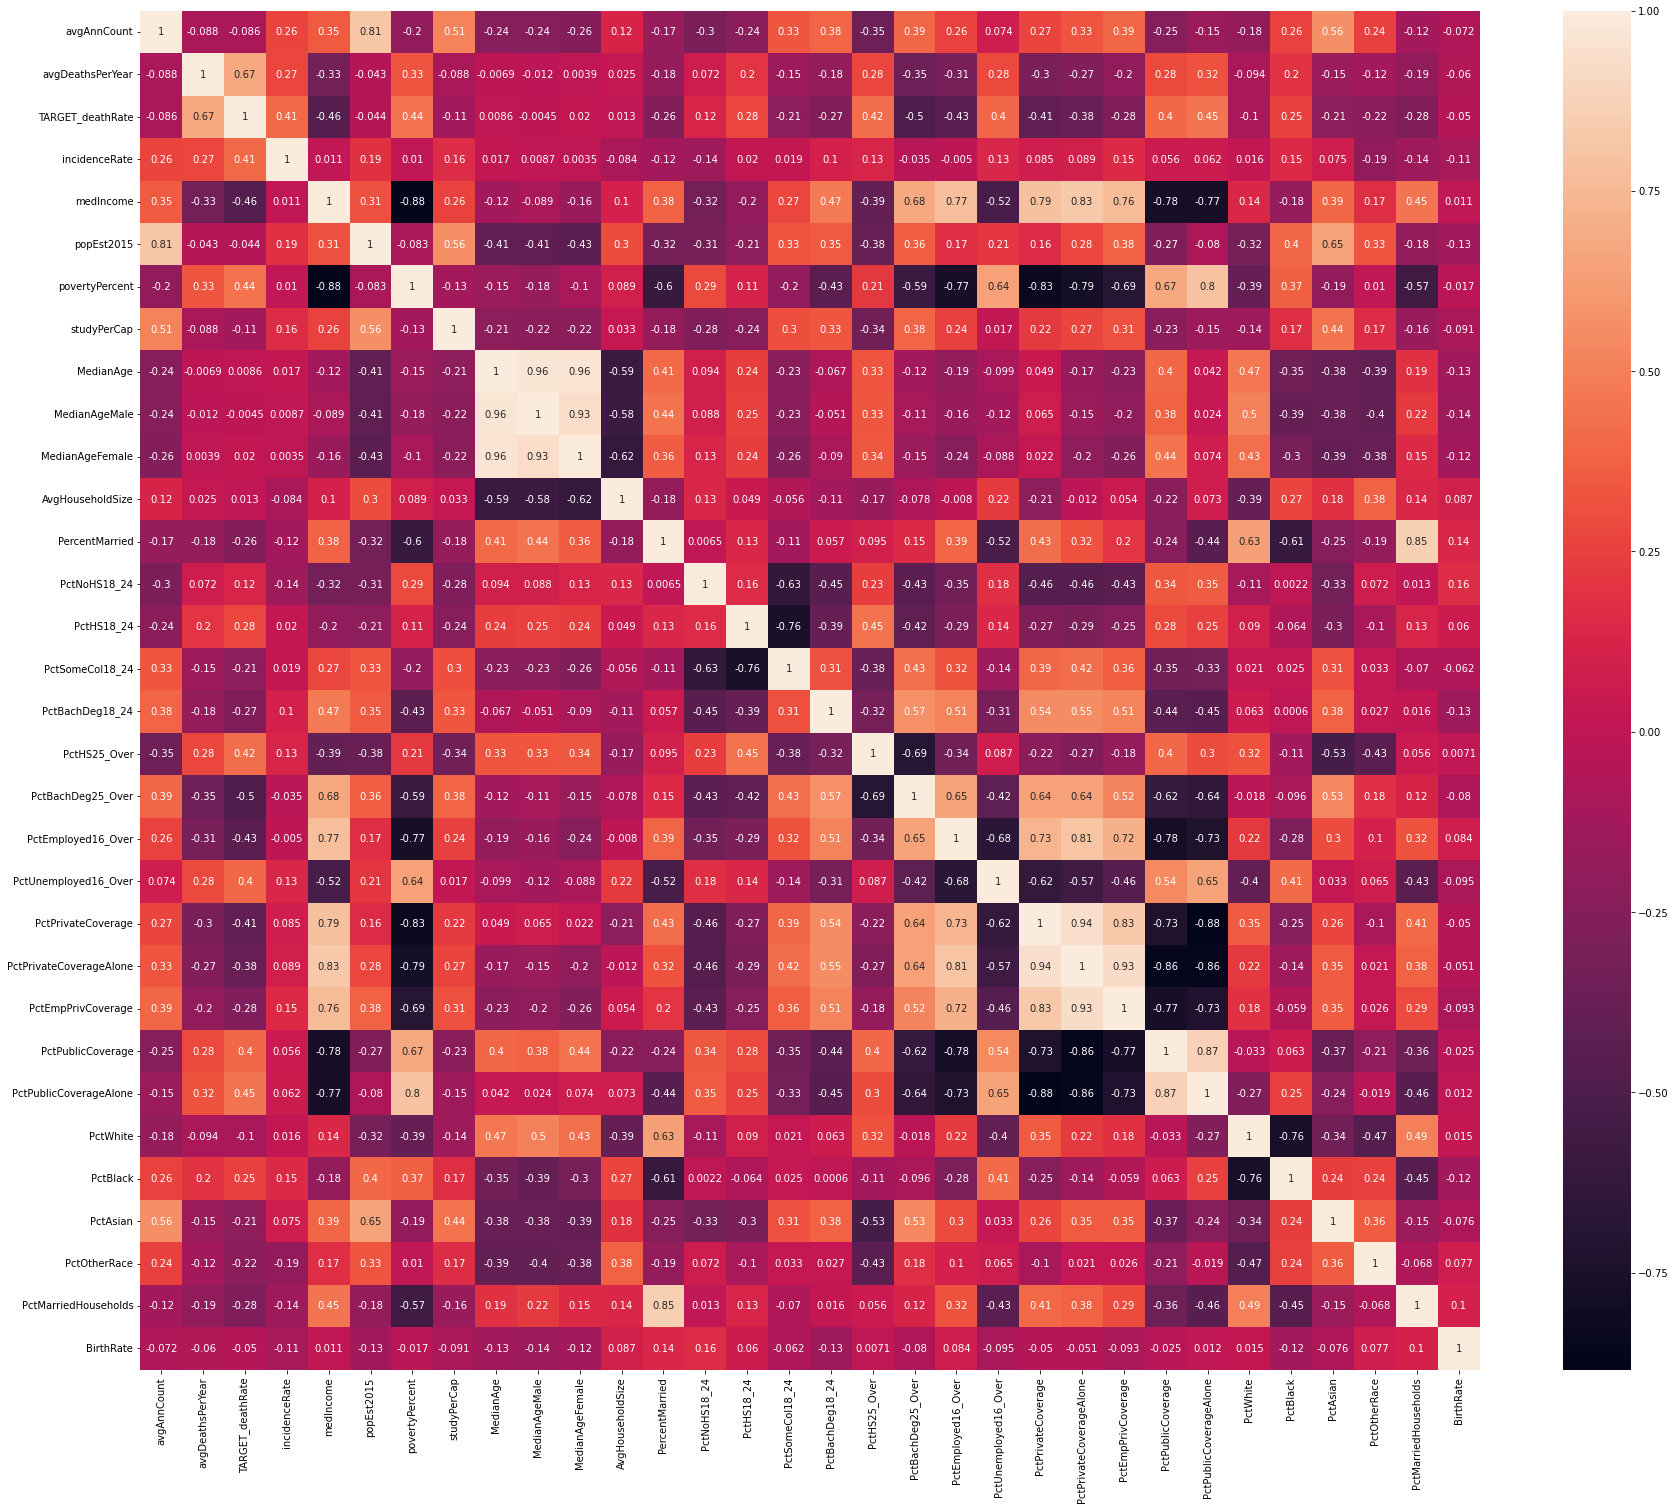

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,25))
sns.heatmap(correlacao, annot=True);

<Figure size 1440x1440 with 0 Axes>

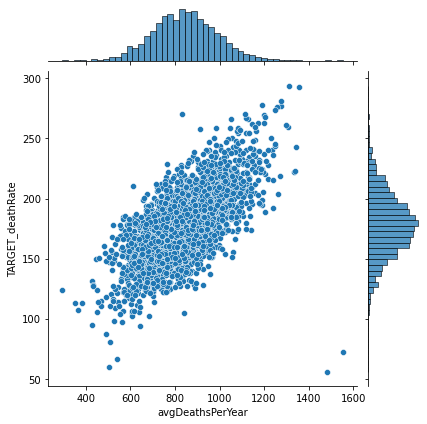

In [139]:
#comparando graficamente a maior correlacao com o target

plt.figure(figsize=(20,20))
sns.jointplot(data=df, x='avgDeathsPerYear', y='TARGET_deathRate');

<Figure size 1440x1440 with 0 Axes>

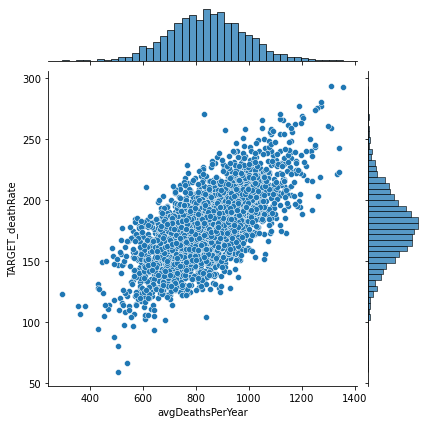

In [140]:
df = df[~(df['avgDeathsPerYear']>1375)]
plt.figure(figsize=(20,20))
sns.jointplot(data=df, x='avgDeathsPerYear', y='TARGET_deathRate');

3. Como o target está distribuído? Quais são as seus valores de média, mediana e variância? A distribuição é assimétrica?

In [141]:
df['TARGET_deathRate'].describe()

count    3045.000000
mean      178.566207
std        27.481759
min        59.700000
25%       161.200000
50%       178.100000
75%       195.200000
max       293.900000
Name: TARGET_deathRate, dtype: float64

In [142]:
import statistics
print('Quais são as seus valores de média, mediana e variância?')
print('A média é ', statistics.mean(df["TARGET_deathRate"]),
      ', mediana é ', statistics.median(df["TARGET_deathRate"]),
      ', desvio padrão é ', statistics.stdev(df["TARGET_deathRate"]),
      ' e a variância é ', statistics.variance(df["TARGET_deathRate"]))

Quais são as seus valores de média, mediana e variância?
A média é  178.56620689655173 , mediana é  178.1 , desvio padrão é  27.481758689598866  e a variância é  755.2470606733427


In [143]:
#Distribuição do Target - distribuição normal
sns.histplot (data=df, x = 'TARGET_deathRate', kde = True);

3. Pensando em um modelo de Regressão Linear Simples escolha uma feature para ser a variável independente, mas procure escolher uma que faça sentido com o modelo linear. 

In [144]:
#Apos a EDA a feature escolina foi a de maior correlação 'avgDeathsPerYear'

    3.1. Como é a distribuição da feature escolhida? Ela possui outliers? Precisa de alguma limpeza nos dados?

In [145]:
#removido os outliers e colunas com muitos nulos na EDA
df["avgDeathsPerYear"].skew()

0.10149220512855044

In [146]:
sns.boxplot(x="avgDeathsPerYear", data=df);

    3.2. Treine um modelo de Regressão Linear Simples com o objetivo de predizer a variável dependente 'TARGET_deathRate'. Apresente o modelo treinado e avalie a normalidade dos resíduos. Não esqueça de dividir o dataset em treino e teste para uma posterior avaliação do modelo.

In [147]:
# crie duas variáveis, X e y, respectivamente os arrays da feature avgDeathsPerYear e do target
X = df['avgDeathsPerYear']
y = df['TARGET_deathRate']

In [148]:
# 1) Importe a classe do estimador que se deseja treinar
from sklearn.linear_model import LinearRegression

In [149]:
# 2) Instancie a classe do estimador, escolhendo os hiperparâmetros desejados
reg_lin = LinearRegression()

In [150]:
# 3) Separe os dados em dados de treino e dados de teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3)

In [151]:
#shape de X e y
X.shape, y.shape

((3045,), (3045,))

In [152]:
X_test.shape, y_test.shape

((914,), (914,))

In [153]:
X_train.shape, y_train.shape

((2131,), (2131,))

In [154]:
# 4) Treine o modelo, usando os dados de treino. 

reg_lin.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [156]:
# 5) Previsão com os dados do teste 

y_pred = reg_lin.predict(X_test.values.reshape(-1, 1))

In [157]:
# previsão usando o predict

reg_lin.predict([[500]])

array([131.84732073])

In [158]:
# Calculando o resíduo
residuo = y_test - y_pred

In [159]:
residuo.describe()

count    914.000000
mean      -0.772052
std       19.614067
min      -70.985223
25%      -13.636038
50%       -1.074351
75%       11.761120
max       93.577163
Name: TARGET_deathRate, dtype: float64

    3.3 Utilizando as métricas de avaliação verifique o resultado do modelo para o conjunto de dados de teste.

In [82]:
# pegue o intercept. Dica: veja os atributos do modelo treinado!
reg_lin.intercept_

62.71553899101863

In [83]:
# peque o coeficiente angular. Dica: veja os atributos do modelo treinado!
reg_lin.coef_[0]

0.1373212837577564

In [84]:
reg_lin.coef_

array([0.13732128])

In [123]:
b0 = reg_lin.intercept_
b1 = reg_lin.coef_[0]

Isto quer dizer que:

> O mínimo de mortes é 62.72 (por 100k habitantes).

> Aumentando a variável "avgDeathsPerYear" em 1p.p. faz com que TARGET_deathRate incremente 13.73%

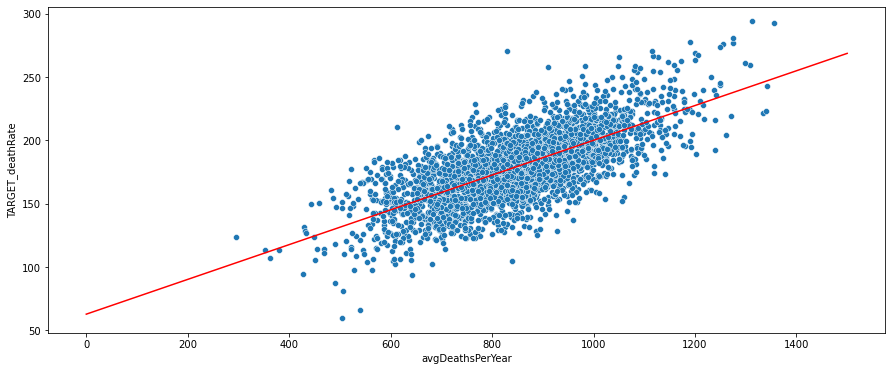

In [92]:
plt.figure(figsize=(15, 6))

# faça um scatterplot da fgeature pelo target
sns.scatterplot(data=df, x="avgDeathsPerYear", y="TARGET_deathRate")

# faça um plot da reta do modelo
# crie um array com os valores de x. dica:  use o range aproximado da variável avgDeathsPerYear
# crie um array de y com a equação da reta usando os coeficientes encontrados
x = np.linspace(0, 1500, 10000)
y = reg_lin.intercept_ + reg_lin.coef_[0]*x
plt.plot(x, y, color="red");

In [161]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.48165585221320206

In [162]:
# Calculando as métricas:
from sklearn import metrics
# calculando MAE
metrics.mean_absolute_error(y_test,y_pred)

15.340975953422438

In [163]:
# calculando MSE
metrics.mean_squared_error(y_test,y_pred)

384.8867892677437

In [164]:
# calculando RMSE
metrics.mean_squared_error(y_test,y_pred,squared=False)

19.61853178165338

4. Agora, treine um modelo de Regressão Linear múltipla sem utilizar o min-max scaler e outro com o min-max scaler. Qual obteve o melhor resultado no teste? Quais são as features mais importantes?

In [93]:
# selecione todas as outras colunas numéricas como a variável de features X
# dica: df.select_dtypes(include=[np.number])
df = df.select_dtypes(include=[np.number])
df = df.dropna(axis='columns', how='any')

In [95]:
# Criando o X e o y
X = df.drop(columns=['TARGET_deathRate'])
y = df['TARGET_deathRate']

In [96]:
# Nomes das features
X.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [97]:
# Shape de X
X.shape

(3045, 28)

Intercepto: 78.67918579983943
Coeficientes angulares: [-8.33234940e-04  8.92949693e-02  1.31111612e-01  1.23092538e-04
  2.23859004e-06  3.05404944e-01 -4.23993620e-04 -2.82786516e-03
 -5.19982795e-01  1.57491118e-01 -6.22216474e-01  5.93588793e-01
 -8.25160211e-02  1.52769143e-01 -9.33749122e-02  2.96724356e-01
 -7.99765058e-01  4.81179595e-01 -5.00599499e-01  2.51544487e-01
  9.58793976e-02 -1.19947456e-01 -4.22518139e-02 -5.60507803e-02
 -2.30410922e-02 -8.16463859e-01 -7.41209452e-01 -4.13002645e-01]

####################################################



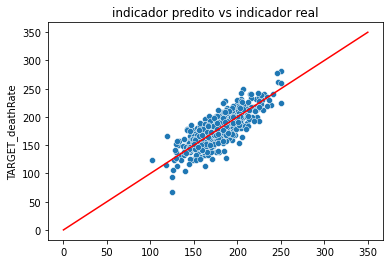

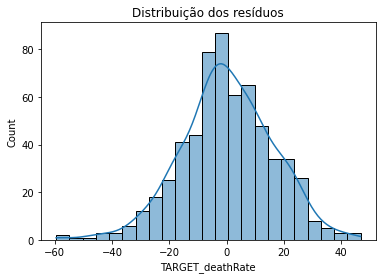


####################################################


Métricas de avaliação (dados de teste):

R^2: 0.6400611996862186
MAE: 12.527494676660293
MSE: 257.81449310111265
RMSE: 16.05660278829593


In [105]:
# Etapas da modelagem

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_treino,y_treino)

print("Intercepto:", modelo.intercept_ )
print("Coeficientes angulares:",modelo.coef_ )

print("\n####################################################\n")

# 5)
predictions = modelo.predict(X_teste)


plt.title("indicador predito vs indicador real")
sns.scatterplot(x=predictions, y=y_teste)
plt.plot(np.linspace(0, 350, 100), np.linspace(0, 350, 100), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação (dados de teste):\n")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_teste, predictions))
print('MAE:', metrics.mean_absolute_error(y_teste, predictions))
print('MSE:', metrics.mean_squared_error(y_teste, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predictions)))

In [106]:
#Coeficientes angulares
modelo.coef_

array([-8.33234940e-04,  8.92949693e-02,  1.31111612e-01,  1.23092538e-04,
        2.23859004e-06,  3.05404944e-01, -4.23993620e-04, -2.82786516e-03,
       -5.19982795e-01,  1.57491118e-01, -6.22216474e-01,  5.93588793e-01,
       -8.25160211e-02,  1.52769143e-01, -9.33749122e-02,  2.96724356e-01,
       -7.99765058e-01,  4.81179595e-01, -5.00599499e-01,  2.51544487e-01,
        9.58793976e-02, -1.19947456e-01, -4.22518139e-02, -5.60507803e-02,
       -2.30410922e-02, -8.16463859e-01, -7.41209452e-01, -4.13002645e-01])

In [107]:
#Coeficiente linear
modelo.intercept_

78.67918579983943

In [109]:
#coeficientes
coeff_df = pd.DataFrame(modelo.coef_, X.columns, columns=['Parameter value'])
coeff_df

Parameter value
avgAnnCount                   -0.000833
avgDeathsPerYear               0.089295
incidenceRate                  0.131112
medIncome                      0.000123
popEst2015                     0.000002
povertyPercent                 0.305405
studyPerCap                   -0.000424
MedianAge                     -0.002828
MedianAgeMale                 -0.519983
MedianAgeFemale                0.157491
AvgHouseholdSize              -0.622216
PercentMarried                 0.593589
PctNoHS18_24                  -0.082516
PctHS18_24                     0.152769
PctBachDeg18_24               -0.093375
PctHS25_Over                   0.296724
PctBachDeg25_Over             -0.799765
PctUnemployed16_Over           0.481180
PctPrivateCoverage            -0.500599
PctEmpPrivCoverage             0.251544
PctPublicCoverage              0.095879
PctPublicCoverageAlone        -0.119947
PctWhite                      -0.042252
PctBlack                      -0.056051
PctAsian                      -0.023041
PctOtherRace                  -0.816464
PctMarriedHouseholds          -0.741209
BirthRate                     -0.413003

In [119]:
print("\nPerformance de TREINO\n")

predictions = modelo.predict(X_treino)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_treino)
plt.plot(np.linspace(0, 350, 100), np.linspace(0, 350, 100), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_treino-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação (dados de treino):\n")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_treino, predictions))
print('MAE:', metrics.mean_absolute_error(y_treino, predictions))
print('MSE:', metrics.mean_squared_error(y_treino, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_treino, predictions)))


Performance de TREINO




####################################################


Métricas de avaliação (dados de treino):

R^2: 0.6756785505802463
MAE: 12.064017359737042
MSE: 247.92236255240024
RMSE: 15.74555056364814


In [110]:
#Describe da feature 'LotArea' após o scaler
((df['TARGET_deathRate'] - df['TARGET_deathRate'].min())/(df['TARGET_deathRate'].max() - df['TARGET_deathRate'].min())).describe()

count    3045.000000
mean        0.507541
std         0.117343
min         0.000000
25%         0.433390
50%         0.505551
75%         0.578565
max         1.000000
Name: TARGET_deathRate, dtype: float64

In [112]:
#Aplicando o Min-Max Sacaler para todas as features no dataframe:

from sklearn.preprocessing import MinMaxScaler 

#1) Instanciar o scaler
mms = MinMaxScaler()

#2) Treinar o scaler com os dados de treino
mms.fit(X_treino)

#3) Transformando os dados
X_treino_scaled = mms.transform(X_treino)
X_teste_scaled = mms.transform(X_teste)

Intercepto: 121.39040548563051
Coeficientes angulares: [-12.88514511  89.5266617  106.58062923  12.67791598  10.15693297
  13.37673653  -4.13915673  -1.68795271 -21.99527224   6.83511453
  -2.45644842  29.32328637  -5.28927695  11.01465518  -4.83682045
  14.03506204 -31.7506728   13.95420826 -34.4913055   14.18710904
   5.16789953  -5.27768807  -3.76004122  -4.75680684  -0.98199809
 -31.6328688  -35.88017791  -8.80776251]

####################################################



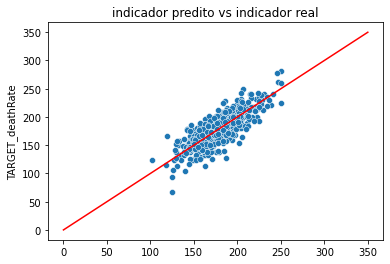

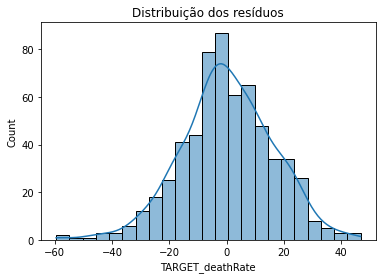


####################################################


Métricas de avaliação (dados de teste):

R^2: 0.6400611996861552
MAE: 12.527494676660925
MSE: 257.81449310115806
RMSE: 16.056602788297344


In [117]:
#Avaliando um modelo com os dados escalados:

X = df.drop(columns=["TARGET_deathRate"])
y = df['TARGET_deathRate']

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# NOVO: aplicando o scaler!! - usamos o minmax pra que todas as features
# tenham o mesmo intervalo no espaço amostral - (0, 1)
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

# agora, vamos FITAR o scaler COM OS DADOS DE TREINO
mms.fit(X_treino)

# transformando os dados
X_treino = mms.transform(X_treino)
X_teste = mms.transform(X_teste)

X_treino = mms.fit_transform(X_treino)
X_teste = mms.transform(X_teste)


# 4)
modelo = estimador.fit(X_treino, y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficientes angulares:", modelo.coef_)

print("\n####################################################\n")

# 5)
predictions = modelo.predict(X_teste)

plt.title("indicador predito vs indicador real")
sns.scatterplot(x=predictions, y=y_teste)
plt.plot(np.linspace(0, 350, 1000), np.linspace(0, 350, 1000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação (dados de teste):\n")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_teste, predictions))
print('MAE:', metrics.mean_absolute_error(y_teste, predictions))
print('MSE:', metrics.mean_squared_error(y_teste, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predictions)))

5. Compare os três modelos desenvolvidos.

regressão simples:
R2= 0.48 
MAE= 15.34
MSE= 384.89
RMSE= 19.91

regressão múltipla:
R2= 0.64 
MAE= 12.53
MSE= 257.81
RMSE= 16.06

regressão múltipla (Min-Max Scaler):
R2= 0.68
MAE= 11.96
MSE= 243.13
RMSE= 15.59